# Analisis de Datos: Sismos Distancia 30

In [1]:
import sys 
sys.path.append('..')

from framework import Framework
import pandas as pd

In [2]:
df = pd.read_csv('Datasets/dataset30.csv')
df

,0,1,2,3,4,5
0,2786,2786,3147,838,4066,3344
1,2786,3147,838,4066,3344,2012
2,3147,838,4066,3344,2012,1744
3,838,4066,3344,2012,1744,2786
4,4066,3344,2012,1744,2786,403
...,...,...,...,...,...,...
4884,2338,1623,2785,2981,2060,2849
4885,1623,2785,2981,2060,2849,785
4886,2785,2981,2060,2849,785,2894
4887,2981,2060,2849,785,2894,2894


In [3]:
fw = Framework(
    dataframe  = df,
    inputs     = ['{}'.format(i) for i in range(5)],
    target     = '5',
    save_dir   = "Modelos",
    test_size  = 0.15,
    random_state=0
)
hidden_layers = (5,200,150,100,50)
max_iter = 150

# svm_model = "svm_distancia_30"
# mlp_model = "mlp_distancia_30"
# sequential_model = "sequential_distancia_30"

# fw.load_svm_model(svm_model)
# fw.load_mlp_model(mlp_model)
# fw.load_sequential_model(sequential_model)

In [4]:
fw.get_svm_model()
print("SVM RMSE:",fw.get_svm_rmse())

SVM RMSE: (1117.7163976422544, 1013.6246749020012)


In [5]:
fw.save_svm_model('mlp_distancia_30')

In [6]:
fw.get_mlp_model(hidden_layers=hidden_layers,max_iter=max_iter)
print("MLP RMSE:",fw.get_mlp_rmse())

MLP RMSE: (1024.1190129341871, 990.1701097387553)


/mnt/d/GitHub/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [7]:
fw.save_mlp_model('mlp_distancia_30')

In [8]:
fw.get_sequential_model(hidden_layers=hidden_layers, epochs=max_iter)
print("Sequential RMSE:",fw.get_sequential_rmse())

Sequential RMSE: (1061.472913998706, 1003.474729203369)


In [9]:
fw.save_sequential_model('sequential_distancia_30')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Modelos/sequential_distancia_30/assets


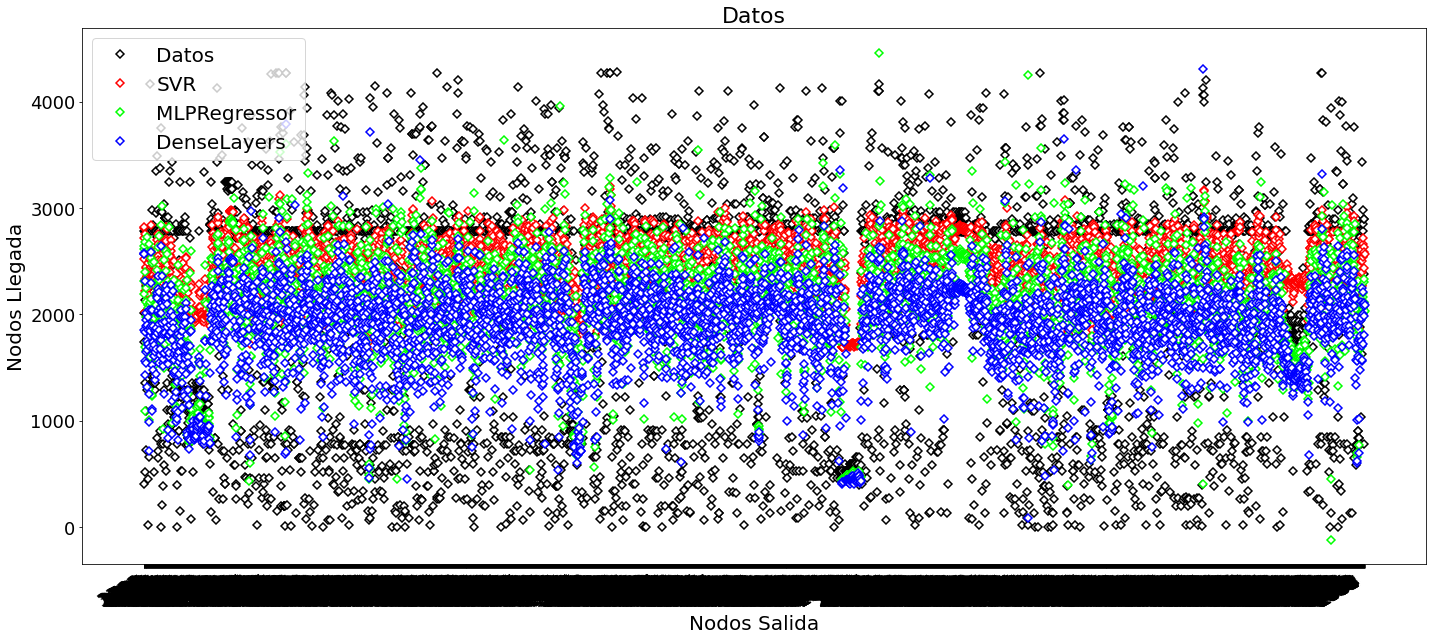

In [10]:
fw.plot_compare_nodes(
    'Graficas/modelos_distancia30.png',
    start_offset = 5,
    end_offset   = 4894,
    x_label="Nodos Salida",
    y_label="Nodos Llegada",
    figsize=(20,9),
    title_fontsize = 22,
    label_fontsize = 20,
    legend_fontsize = 20,
    ticks_fontsize = 18,
)

4276


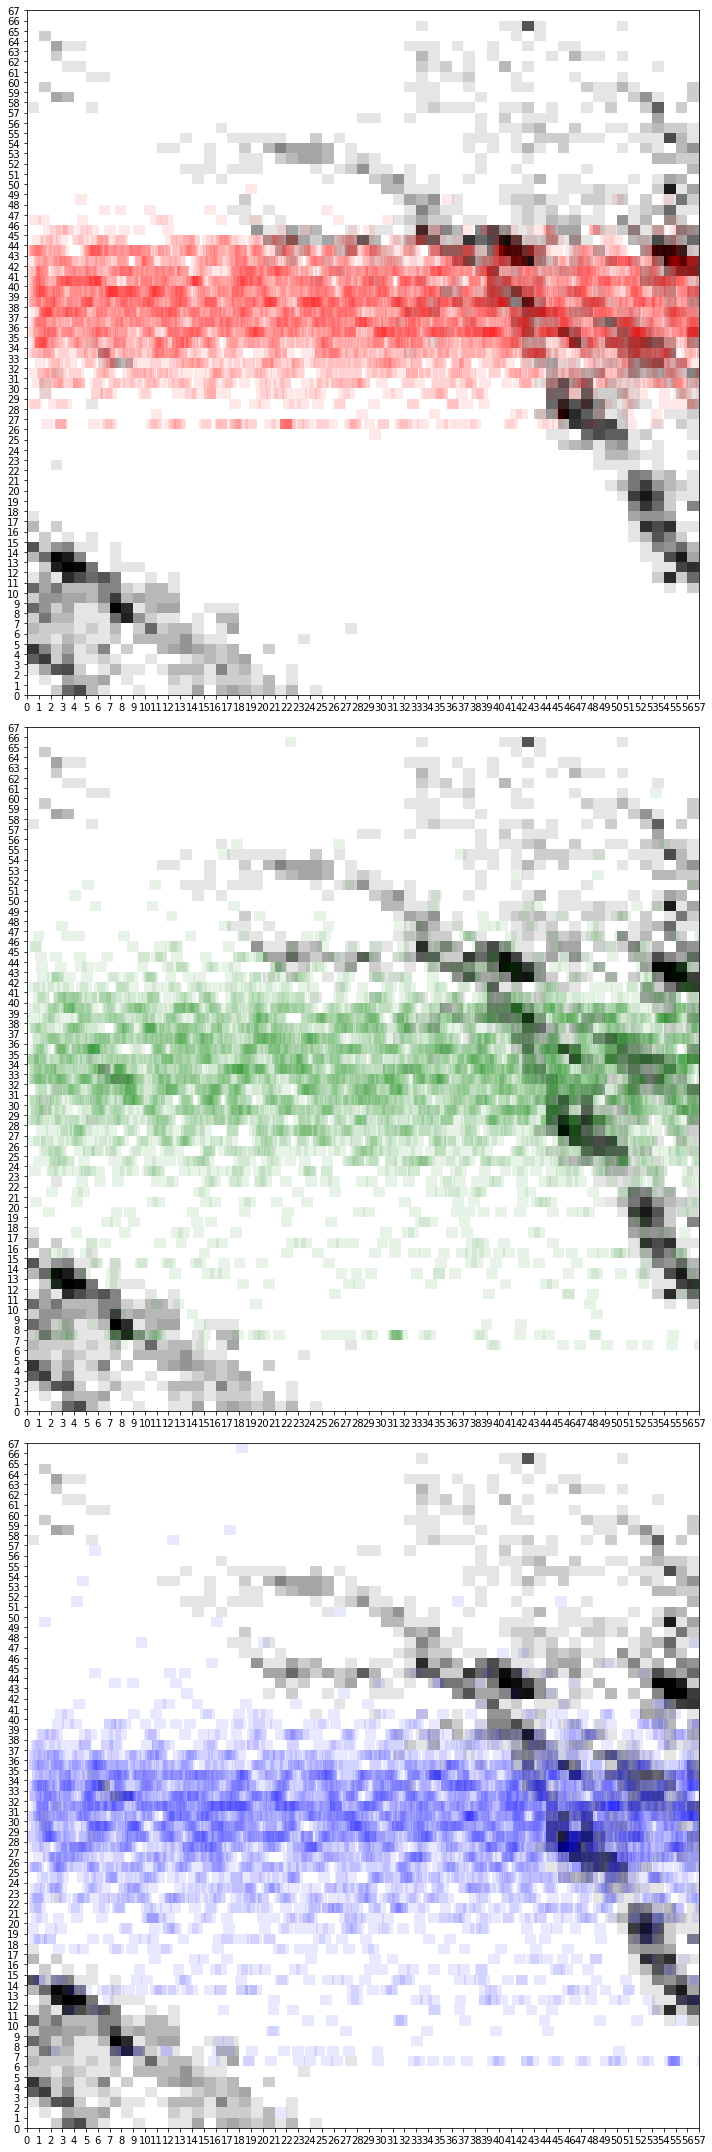

In [11]:
fw.plot_grid_nodes(
    'Graficas/grid_distancia30.png',
    figsize=(10,30),
    alphaData=0.1,
    alpha=0.09,
    dpi=120
)

4276
(65, 65)


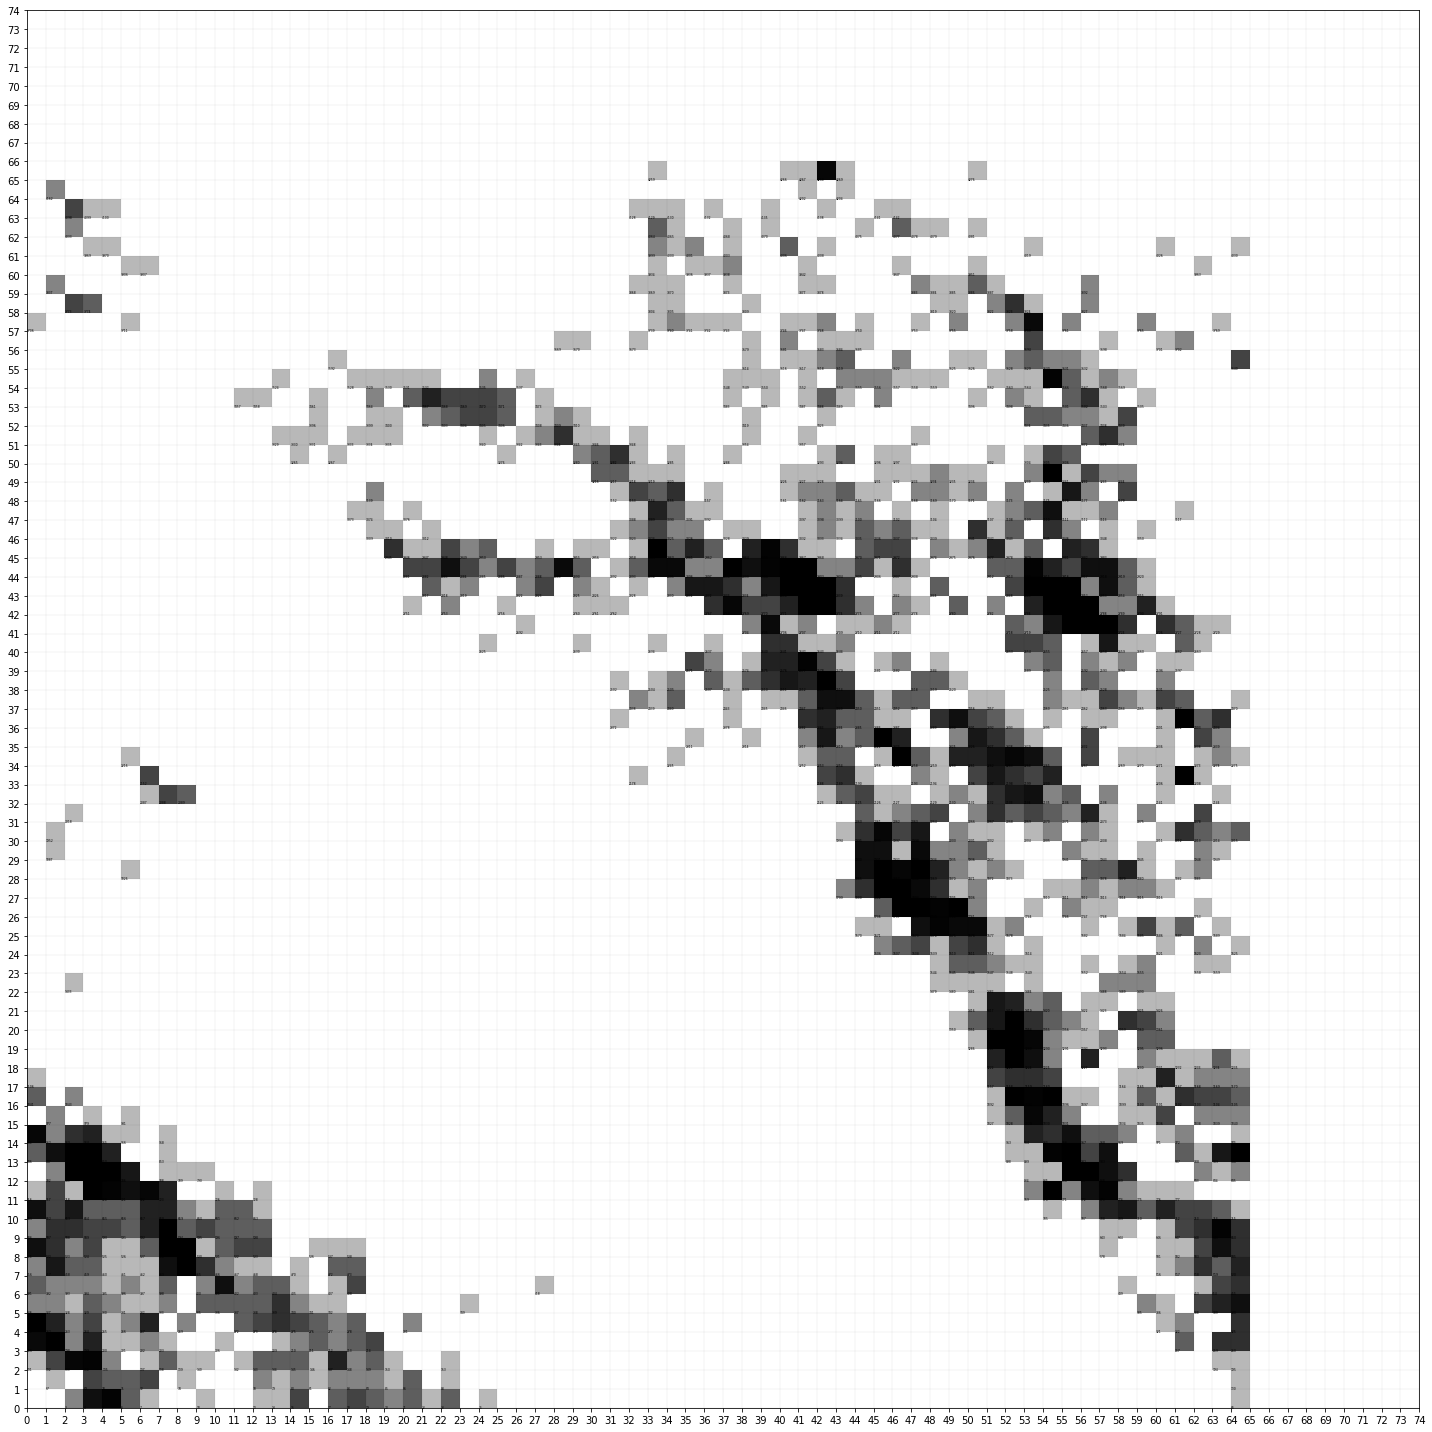

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from math import sqrt

fig, ax = plt.subplots(figsize=(20,20))
#ax.imshow(data, cmap=cmap, norm=norm)

min_val = min(fw.y_values)
max_val = max(fw.y_values)
print(max_val)
#print(sqrt(max_val))
rows = cols = int(sqrt(max_val))

vals_xy = ((max_val+1)//cols, (max_val+1)//rows)
print(vals_xy)

printed={}
for i in range(3):
    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=0.05)
    ax.set_xticks(np.arange(0,vals_xy[0]+10, 1));
    ax.set_yticks(np.arange(0,vals_xy[1]+10, 1));
    for value in fw.y_values:
        xy = ((value-1)%cols,(value-1)//rows)
        #print(xy)
        rectangle = Rectangle(xy, 1, 1,alpha=0.1, facecolor='k')
        ax.add_patch(rectangle)
        
        if not printed.get(value,False):
            ax.text(xy[0],xy[1],str(value), fontsize=3)
            printed[value]=True
        
plt.tight_layout()
plt.show()

In [13]:
fig.savefig('Graficas/datos_30.png', dpi=240)